In [4]:
from sklearn.datasets import fetch_california_housing
import math, copy
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

Bad value in file './deeplearning.mplstyle', line 6 ('axes.edgecolor : #4f4f4f'): Key axes.edgecolor: '' does not look like a color arg
Bad value in file './deeplearning.mplstyle', line 7 ('axes.labelcolor : #4f4f4f'): Key axes.labelcolor: '' does not look like a color arg
Bad value in file './deeplearning.mplstyle', line 17 ('xtick.color : #4f4f4f'): Key xtick.color: '' does not look like a color arg
Bad value in file './deeplearning.mplstyle', line 19 ('ytick.color : #4f4f4f'): Key ytick.color: '' does not look like a color arg
Bad value in file './deeplearning.mplstyle', line 6 ('axes.edgecolor : #4f4f4f'): Key axes.edgecolor: '' does not look like a color arg
Bad value in file './deeplearning.mplstyle', line 7 ('axes.labelcolor : #4f4f4f'): Key axes.labelcolor: '' does not look like a color arg
Bad value in file './deeplearning.mplstyle', line 17 ('xtick.color : #4f4f4f'): Key xtick.color: '' does not look like a color arg
Bad value in file './deeplearning.mplstyle', line 19 ('ytic

In [5]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = w * x + b  # Usando vetorização do NumPy
    return f_wb

def compute_cost(x, y, w, b):
    m = x.shape[0]
    f_wb = w * x + b
    cost = np.sum((f_wb - y)**2)
    total_cost = (1 / (2 * m)) * cost
    return total_cost

def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db
    
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

def plot_housing_data(x, y, w, b):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, marker='x', c='r', label='Dados Reais')
    
    # Plot da previsão
    f_wb = compute_model_output(x, w, b)
    plt.plot(x, f_wb, c='b', label='Nossa Previsão')
    
    plt.title("Housing Prices California")
    plt.ylabel('Price (in $100,000s)')
    plt.xlabel('Median Income (in $10,000s per year)')
    plt.legend()
    plt.show()

def plot_residuals(x, y, w, b):
    f_wb = compute_model_output(x, w, b)
    errors = f_wb - y
    
    plt.figure(figsize=(8,4))
    plt.scatter(x, errors, marker='o', c='g', alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Gráfico de Resíduos (Erros)")
    plt.xlabel("Renda")
    plt.ylabel("Erro (Previsto - Real)")
    plt.show()

def plot_cost_parabola(x, y, w_range, b_fixo, w_atual):
    costs = []
    for w in w_range:
        costs.append(compute_cost(x, y, w, b_fixo))
    
    plt.figure(figsize=(8,5))
    plt.plot(w_range, costs, c='b')
    
    # Bolinha Vermelha (Custo Atual)
    custo_atual = compute_cost(x, y, w_atual, b_fixo)
    plt.scatter(w_atual, custo_atual, color='red', s=100, label=f'Custo em w={w_atual:.2f}')
    
    plt.title(f"Custo J em relação a w (b = {b_fixo})")
    plt.xlabel("w")
    plt.ylabel("Custo J")
    plt.legend()
    plt.show()

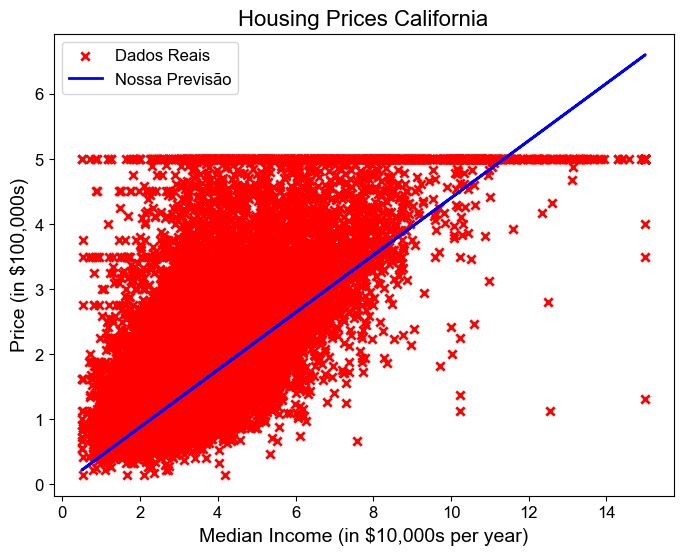

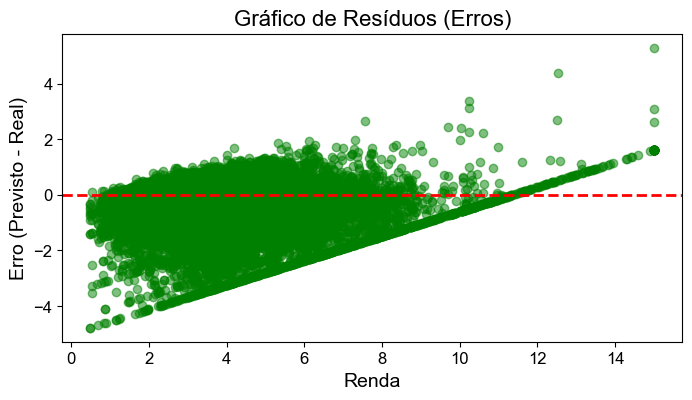

KeyboardInterrupt: 

In [7]:
# 1. Carregar dados
housing = fetch_california_housing()
x_train = housing.data[:, 0]
y_train = housing.target

# 2. Definir parâmetros para teste
w_test = 0.44
b_test = 0.0

# 3. Chamar as funções de exibição
plot_housing_data(x_train, y_train, w_test, b_test)
plot_residuals(x_train, y_train, w_test, b_test)

# 4. Ver a parábola com a bolinha vermelha
w_range = np.linspace(-1, 2, 100)
plot_cost_parabola(x_train, y_train, w_range, b_fixo=0, w_atual=w_test)

print(f"Custo atual: {compute_cost(x_train, y_train, w_test, b_test):.4f}")


w_init = 0
b_init = 0

iterations = 1000
tmp_alpha = 0.01

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")
print(f"Modelo final: Preço = {w_final:.3f} * Renda + {b_final:.3f}")

plot_housing_data(x_train, y_train, w_final, b_final)
